In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [36]:
# Load a labeled dataset
df = pd.read_csv('df_jobs_cleaned.csv')  # Load the original dataset

In [37]:
# Convert 'VacancyDuration' into two categories: 'Short Vacancy' (< 180 days) and 'Long Vacancy' (>= 180 days)
df['VacancyDuration'] = df['VacancyDuration'].apply(lambda x: 'Short Vacancy' if x < 180 else 'Long Vacancy')

In [38]:
target = 'VacancyDuration'
X = df[['SalaryMin', 'SalaryMax', 'DisabilityMention']]  # Select relevant features
y = df[target]

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print("Sample of Training Set (X_train):")
print(X_train.head())
print("Sample of Testing Set (X_test):")
print(X_test.head())
print("Sample of Training Labels (y_train):")
print(y_train.head())
print("Sample of Testing Labels (y_test):")
print(y_test.head())

Sample of Training Set (X_train):
      SalaryMin  SalaryMax  DisabilityMention
6106    45591.0   169378.0              False
3063    47813.0   155403.0              False
7427    31083.0   146757.0              False
1860    41235.0   155403.0              False
8049   112015.0   163252.0              False
Sample of Testing Set (X_test):
      SalaryMin  SalaryMax  DisabilityMention
33      47813.0   155403.0              False
5281    46081.0    59907.0              False
4912    57442.0   155403.0              False
3298    47813.0   155403.0              False
4756    78255.0   108995.0              False
Sample of Training Labels (y_train):
6106    Long Vacancy
3063    Long Vacancy
7427    Long Vacancy
1860    Long Vacancy
8049    Long Vacancy
Name: VacancyDuration, dtype: object
Sample of Testing Labels (y_test):
33       Long Vacancy
5281    Short Vacancy
4912     Long Vacancy
3298     Long Vacancy
4756     Long Vacancy
Name: VacancyDuration, dtype: object


In [17]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
# Make predictions
y_pred = logistic_model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print(report)

Logistic Regression - Accuracy: 0.78
               precision    recall  f1-score   support

 Long Vacancy       0.81      0.95      0.87      1989
Short Vacancy       0.46      0.17      0.25       531

     accuracy                           0.78      2520
    macro avg       0.64      0.56      0.56      2520
 weighted avg       0.74      0.78      0.74      2520



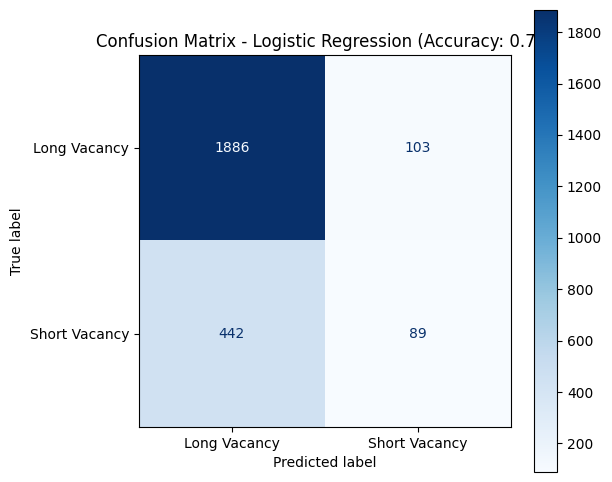

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix - Logistic Regression (Accuracy: {accuracy:.2f})")
plt.savefig("confusion_matrix_logistic.png")
plt.show()

In [26]:
# Normalize the features for Multinomial Naïve Bayes
scaler_nb = MinMaxScaler()
X_train_nb = scaler_nb.fit_transform(X_train)
X_test_nb = scaler_nb.transform(X_test)

In [27]:
# Initialize and train the Multinomial Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train)

MultinomialNB()

In [28]:
# Make predictions with Multinomial Naïve Bayes
y_pred_nb = nb_model.predict(X_test_nb)

In [29]:
# Evaluate the Multinomial Naïve Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naïve Bayes - Accuracy: {accuracy_nb:.2f}")
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

Multinomial Naïve Bayes - Accuracy: 0.79
               precision    recall  f1-score   support

 Long Vacancy       0.79      1.00      0.88      1989
Short Vacancy       0.00      0.00      0.00       531

     accuracy                           0.79      2520
    macro avg       0.39      0.50      0.44      2520
 weighted avg       0.62      0.79      0.70      2520



/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/Downloads/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

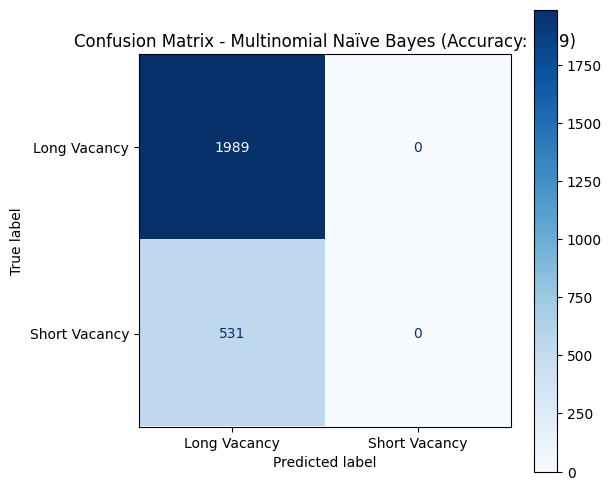

In [30]:
# Confusion Matrix for Multinomial Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=y.unique()).plot(ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix - Multinomial Naïve Bayes (Accuracy: {accuracy_nb:.2f})")
plt.savefig("confusion_matrix_nb.png")
plt.show()